This Notebook is for testing ridge regression against a dataset and validate using the performance against standard RF Regressor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from harness import RMSE

#### Exploratory data analysis

In [29]:
np.array(train_df[['smiles','gap']].head(100))

array([['c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2nsnc12', 1.19],
       ['C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[SiH2]C=c12', 1.6],
       ['[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-23)c2ccccc12', 1.49],
       ['[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13)c1=C[SiH2]C=c21',
        1.36],
       ['c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1', 1.98],
       ['C1=Cc2cnc3cc4cc(-c5scc6[nH]ccc56)c5ccccc5c4cc3c2[SiH2]1', 1.81],
       ['c1ncc(s1)-c1cnc2c(c1)oc1c2ccc2ccccc12', 2.91],
       ['c1sc(-c2ccc3c(c2)sc2c3c3=CCC=c3c3cccnc23)c2[se]ccc12', 2.17],
       ['c1ccc(o1)-c1cc2cc3cc4c5c[nH]cc5ccc4cc3cc2o1', 2.19],
       ['[nH]1ccc2c3c[nH]cc3c3cc(-c4cncs4)c4=CCC=c4c3c12', 1.71],
       ['[nH]1c(cc2c3cocc3c3c(ccc4ccc5=CCC=c5c34)c12)-c1cccs1', 2.08],
       ['c1cc2oc3c(sc4cc([se]c34)-c3cncc4nsnc34)c2o1', 1.42],
       ['[nH]1c(cc2cnc3cc4ccoc4cc3c12)-c1ccccc1', 2.96],
       ['[nH]1ccc2ccc3c4ncc(cc4[nH]c3c12)-c1scc2occc12', 2.59],
       ['c1sc(-c2sc(-c3sc(-c4ncncn4)c4nccnc34

#### Training dataset operations - Prepping for training

In [2]:
##Loading training set
train_df = pd.read_csv('../data/train_new_features.csv')

In [3]:
def elem_counts(df):
    df['len_smiles'] = df['smiles'].str.len()
    elements = ['nH', 'n', 'c', 'c1', 'Si', 'SiH2', '=', '-', 'CC', 'ncc', 'C1', 'C', 'H', 'cc', 'ccc', 'cccc', 'cc1',\
           '(C1)', '(c1)', '(o1)', '(s1)', 'nc', 'c12', 'c2', 'c1cc', '(cc1)', 'c2C', 'cc3', 'oc', 'ncc', 'C1=C',\
                'C=c', 'C=C', 'ccn', 'c3', '[se]', '=CCC=', 'c21', 'c1c', 'cn', 'c4c', 'c3c', 'coc',\
               'ccccc', '[SiH2]C', 'cc4', 'sc', 'cccnc', 'cnc', 'scc', 'c1s', 'cc4', 'sc2', '2c2', 'c5', 'c6',\
               'c2c', '[nH]c', 'cnc4', 'C1=C', 'Cc', 'nsnc', 'sccc', 'cocc', '(o2)', '(cn1)']
    for elem in elements:
        col_name = 'count_' + elem
        df[col_name] = df['smiles'].str.count(elem)
    return df

In [4]:
train_df = elem_counts(train_df)

In [5]:
train_df.columns

Index([u'Unnamed: 0', u'feat_001', u'feat_005', u'feat_006', u'feat_007',
       u'feat_025', u'feat_037', u'feat_044', u'feat_068', u'feat_069',
       ...
       u'count_c6', u'count_c2c', u'count_[nH]c', u'count_cnc4', u'count_Cc',
       u'count_nsnc', u'count_sccc', u'count_cocc', u'count_(o2)',
       u'count_(cn1)'],
      dtype='object', length=108)

In [6]:
train_cols = train_df.columns
train_cols = train_cols.difference(['smiles', 'gap', 'Unnamed: 0'])
X = train_df[train_cols]
y = train_df['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print X_train.shape, X_test.shape

(900000, 105) (100000, 105)


In [7]:
RF = RandomForestRegressor(n_estimators=10)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RMSE Values:
run1 - 0.1363
run2 - 0.9637
run3 - 0.9084

In [8]:
#Checking RMSE for training test set
pred = RF.predict(X_test)
print(RMSE(y_test, pred))

RMSE =  0.0908123872994
0.0908123872994


In [9]:
###Calculating feature importances and visualizing
importances = RF.feature_importances_

In [42]:
#zip(X_train.columns[np.argsort(importances)],importances[np.argsort(importances)])

In [11]:
num_features = 10
x_val = importances[np.argsort(importances)[::-1][:num_features]]
x_ticks = X_train.columns[np.argsort(importances)[::-1][:num_features]]

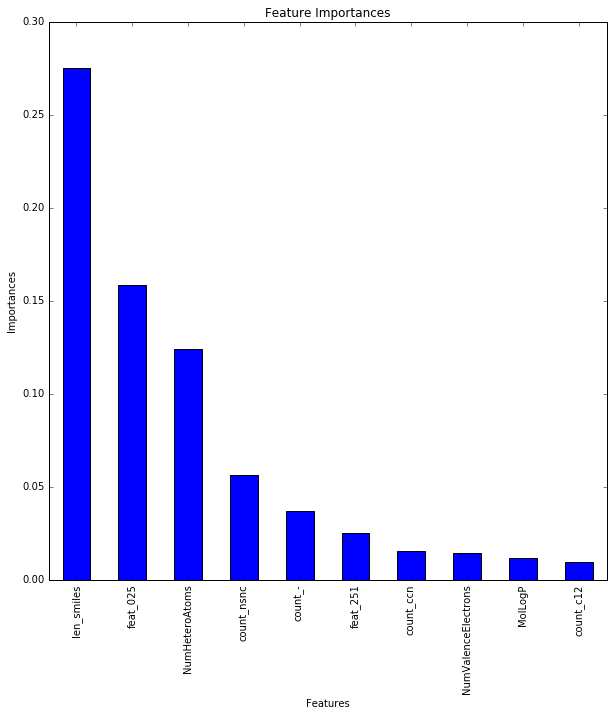

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax = pd.Series(x_val).plot(kind='bar')
ax.set_xticklabels(x_ticks)
ax.set_title('Feature Importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')
plt.savefig('FeatureImportances.png', bbox_inches='tight')

#### To produce the submission file (including the test set preprocessing)

In [62]:
##Load training set
test_df = pd.read_csv('../data/test_new_features.csv')

In [63]:
test_df = elem_counts(test_df)

In [64]:
test_df.columns

Index([u'Unnamed: 0', u'smiles', u'feat_001', u'feat_005', u'feat_006',
       u'feat_007', u'feat_025', u'feat_037', u'feat_044', u'feat_068',
       ...
       u'count_c6', u'count_c2c', u'count_[nH]c', u'count_cnc4', u'count_Cc',
       u'count_nsnc', u'count_sccc', u'count_cocc', u'count_(o2)',
       u'count_(cn1)'],
      dtype='object', length=108)

In [65]:
test_cols = test_df.columns
test_cols = test_cols.difference(['smiles', 'smiles_mol', 'Unnamed: 0'])
test_data = test_df[train_cols]
test_data.shape

(824230, 105)

In [66]:
##Predicting through Random Forests
test_pred = RF.predict(test_data)

In [67]:
#Saving to file
out_df = pd.DataFrame({'Id':np.array(test_df.index), 'Prediction': test_pred})
out_df['Id'] = out_df['Id'] + 1
out_df = out_df.set_index('Id')
out_df.Prediction = out_df.Prediction.astype(float)

In [68]:
out_df.to_csv('../data/abhi_trial_4.csv')

#### Attempting neural networks

In [78]:
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import TanhLayer
from pybrain.structure import FullConnection
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.datasets import SupervisedDataSet

In [79]:
hidden_layer_size = 500
n = FeedForwardNetwork()
inLayer = LinearLayer(X_train.shape[1])
hiddenLayer = SigmoidLayer(hidden_layer_size)
outLayer = LinearLayer(1)

In [80]:
n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)
in_to_hidden = FullConnection(inLayer, hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer, outLayer)
n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)
n.sortModules()
print n

FeedForwardNetwork-6
   Modules:
    [<LinearLayer 'LinearLayer-3'>, <SigmoidLayer 'SigmoidLayer-7'>, <LinearLayer 'LinearLayer-8'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'LinearLayer-3' -> 'SigmoidLayer-7'>, <FullConnection 'FullConnection-5': 'SigmoidLayer-7' -> 'LinearLayer-8'>]



In [81]:
ds = SupervisedDataSet(X_train.shape[1],1)
tr_cols = X_train.columns
for index, row in X_train.iterrows():
    ds.addSample(tuple(row), y_train.loc[index])

In [82]:
trainer = BackpropTrainer(n, ds)
trainer.train()

111308.75453877273